In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import sklearn as skl
import sklearn.model_selection as mdsl
import sklearn.metrics as mtrcs
import tensorflow.keras.utils as tfutils
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import os
# import tensorflow as tf

(30, 30, 3)


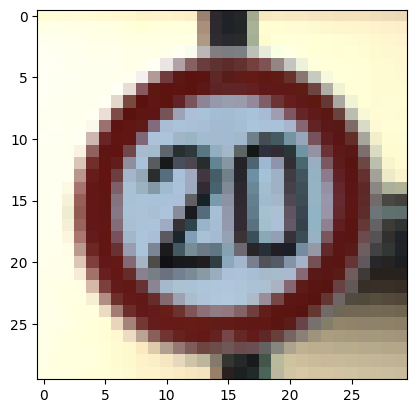

In [2]:
path_data = "/home/soorena/tmp/German-traffic-signs/data"
img = Image.open(f"{path_data}/Train/0/00000_00004_00029.png")
img = img.resize((30, 30))
plt.imshow(img)
print(np.array(img).shape)
plt.show()

In [3]:
train = pd.read_csv(f"{path_data}/Train.csv")
labels_train = train['ClassId'].values
path_imgs_train = train['Path'].values
x_train = []
for path_img in path_imgs_train:
    img = Image.open(f"{path_data}/{path_img}")
    img = img.resize((30,30))
    img = np.array(img)
    x_train.append(img)
x_train = np.array(x_train)
y_train = tfutils.to_categorical(labels_train, 43)

test = pd.read_csv(f"{path_data}/Test.csv")
y_test = test['ClassId'].values
path_imgs_test = test['Path'].values
x_test = []
for path_img in path_imgs_test:
    img = Image.open(f"{path_data}/{path_img}")
    img = img.resize((30,30))
    img = np.array(img)
    x_test.append(img)
x_test = np.array(x_test)

print(x_train.shape, y_train.shape, x_train.shape[0]==y_train.shape[0])
print(x_test.shape, y_test.shape, x_test.shape[0]==y_test.shape[0])

(39209, 30, 30, 3) (39209, 43) True
(12630, 30, 30, 3) (12630,) True


In [4]:
# Building the model
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

2023-02-05 23:07:17.698688: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-05 23:07:17.698708: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-05 23:07:17.698725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (soorena-tp): /proc/driver/nvidia/version does not exist
2023-02-05 23:07:17.698915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15
613/613 [==============================] - 46s 73ms/step - loss: 2.0594 - accuracy: 0.4739 - val_loss: 0.6554 - val_accuracy: 0.8454
Epoch 2/15
613/613 [==============================] - 48s 78ms/step - loss: 0.6628 - accuracy: 0.8048 - val_loss: 0.3709 - val_accuracy: 0.8910
Epoch 3/15
613/613 [==============================] - 47s 77ms/step - loss: 0.4252 - accuracy: 0.8759 - val_loss: 0.2910 - val_accuracy: 0.9231
Epoch 4/15
613/613 [==============================] - 51s 83ms/step - loss: 0.3034 - accuracy: 0.9103 - val_loss: 0.2169 - val_accuracy: 0.9388
Epoch 5/15
613/613 [==============================] - 46s 75ms/step - loss: 0.2561 - accuracy: 0.9268 - val_loss: 0.1793 - val_accuracy: 0.9514
Epoch 6/15
613/613 [==============================] - 47s 77ms/step - loss: 0.2212 - accuracy: 0.9365 - val_loss: 0.2628 - val_accuracy: 0.9417
Epoch 7/15
613/613 [==============================] - 43s 71ms/step - loss: 0.1997 - accuracy: 0.9437 - val_loss: 0.2092 - val_accuracy:

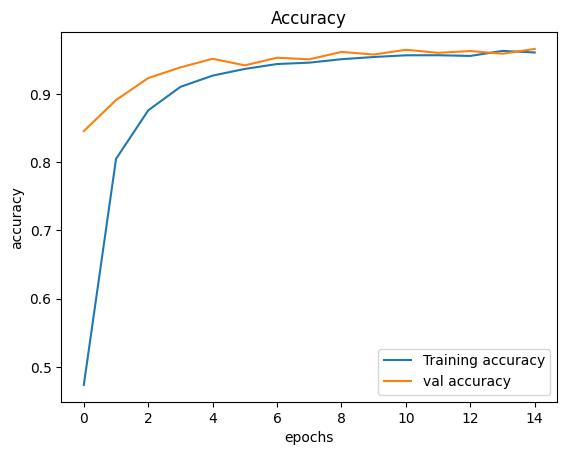

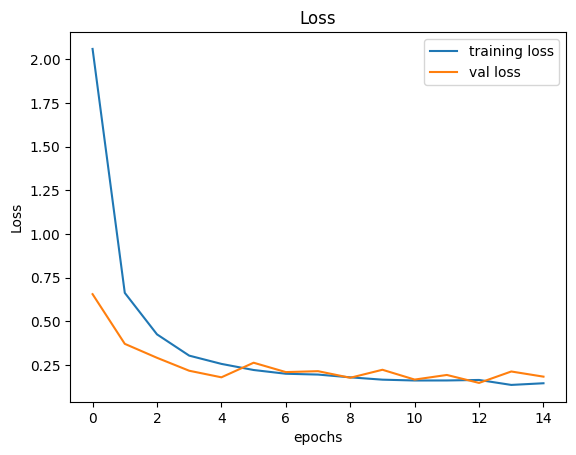

In [5]:
# Training the model
# This could take a while
epochs = 15
y_test_categorical = tfutils.to_categorical(y_test, 43)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test_categorical))
model.save("traffic_classifier.h5")

plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
model = keras.models.load_model("traffic_classifier.h5")
predictions = np.argmax(model.predict(x_test), axis=-1)
print("accuracy: ", round(mtrcs.accuracy_score(y_test, predictions), 4))

395/395 [==============================] - 3s 8ms/step
accuracy:  0.9658
